In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot(x, y, title):

    # size of text and image
    plt.figure(figsize=(10, 10))
    plt.rc("axes", labelsize=15)
    plt.rc("axes", titlesize=15)

    # title, axis label and axis limit
    plt.title(title)
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$p$")
    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, 2 * np.pi)

    # use pixel as marker
    plt.scatter(x, y, 1, marker=",")

    plt.show()

# Standard Map

$$
\vec{x}_{n+1} = M(\vec{x}_n)
\qquad
\Longleftrightarrow
\qquad
M \, (p_n , \theta_n) =
\begin{cases}
    \theta_{n+1} = (p_n + \theta_n)_{\mod2\pi} \\
    p_{n+1} = p_n + k \sin(\theta_{n} + p_n)
\end{cases}
\qquad \text{where} \qquad \vec{x}_{n} = (\theta_n, p_n)
$$

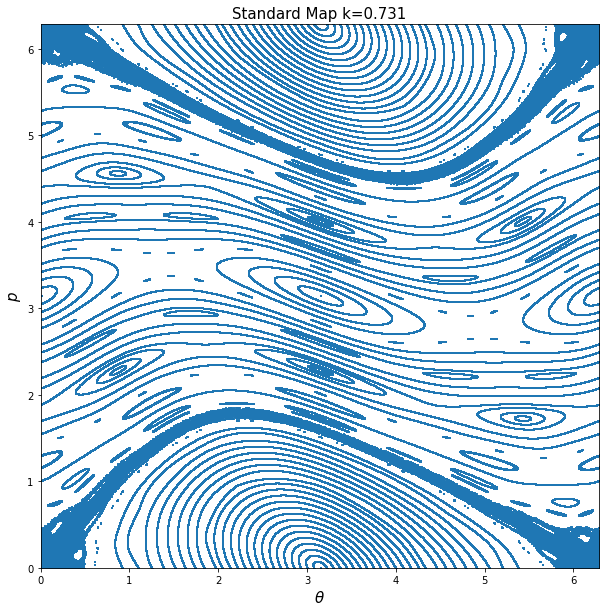

In [3]:
iterations = 100_000
trajectories = 100

k = 0.731

# P and T (P and Theta) are 2 matrix where store the iterations of 100 trajectories.
P = np.empty(iterations * trajectories).reshape(iterations, trajectories)
T = np.empty(iterations * trajectories).reshape(iterations, trajectories)

# The initial values for T for all trajectories is set to pi
# The initial values for P is a uniform distribution [0, 2pi)
T[0] = np.zeros(trajectories) + np.pi
P[0] = np.linspace(0, 2 * np.pi, trajectories, endpoint=False)

for i in range(iterations - 1):
    T[i + 1] = (T[i] + P[i]) % (2 * np.pi)
    P[i + 1] = P[i] + k * np.sin(T[i + 1])

plot(T, P, f"Standard Map k={k}")